# Imports and Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import numpy as np
from scipy.stats import randint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
file_path = 'data_file.csv'
df = pd.read_csv(file_path)
# Drop columns that are not needed.
df.drop(['FileName','md5Hash', 'DebugRVA', 'ExportRVA'], axis=1, inplace=True)
# Delete all the duplicated rows:
df.drop_duplicates(keep='last')
# Target column
target = 'Benign'
X = df.drop(columns=[target])
y = df[target]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = {}


# Logistic Regression

Accuracy: 0.8704489077378571
Confusion Matrix:
 [[6724  401]
 [1218 4154]]
Classification Report:
 {'0': {'precision': 0.8466381264165198, 'recall': 0.9437192982456141, 'f1-score': 0.8925466250746665, 'support': 7125.0}, '1': {'precision': 0.9119648737650933, 'recall': 0.7732688011913627, 'f1-score': 0.8369094389039992, 'support': 5372.0}, 'accuracy': 0.8704489077378571, 'macro avg': {'precision': 0.8793015000908065, 'recall': 0.8584940497184883, 'f1-score': 0.8647280319893329, 'support': 12497.0}, 'weighted avg': {'precision': 0.8747196889320464, 'recall': 0.8704489077378571, 'f1-score': 0.8686302480154663, 'support': 12497.0}}


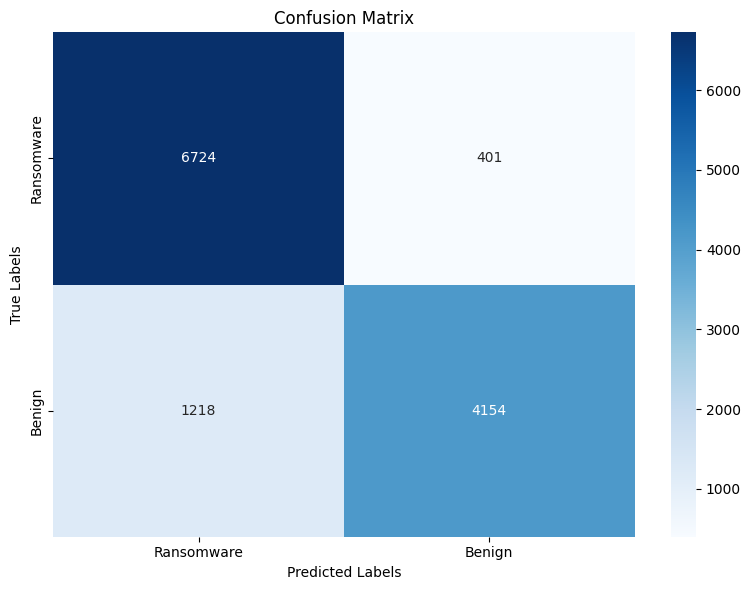

In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

results['Logistic Regression'] = accuracy

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ransomware", "Benign"], yticklabels=["Ransomware", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()

# Show the plot
plt.show()


# Logistic Regression - Cost Sensitive Learning

Accuracy: 0.9023765703768905
Confusion Matrix:
 [[6449  676]
 [ 544 4828]]
Classification Report:
 {'0': {'precision': 0.9222079222079222, 'recall': 0.9051228070175439, 'f1-score': 0.913585493695991, 'support': 7125.0}, '1': {'precision': 0.8771802325581395, 'recall': 0.8987341772151899, 'f1-score': 0.8878264067671938, 'support': 5372.0}, 'accuracy': 0.9023765703768905, 'macro avg': {'precision': 0.8996940773830309, 'recall': 0.9019284921163668, 'f1-score': 0.9007059502315924, 'support': 12497.0}, 'weighted avg': {'precision': 0.9028521769251637, 'recall': 0.9023765703768905, 'f1-score': 0.9025126110056253, 'support': 12497.0}}


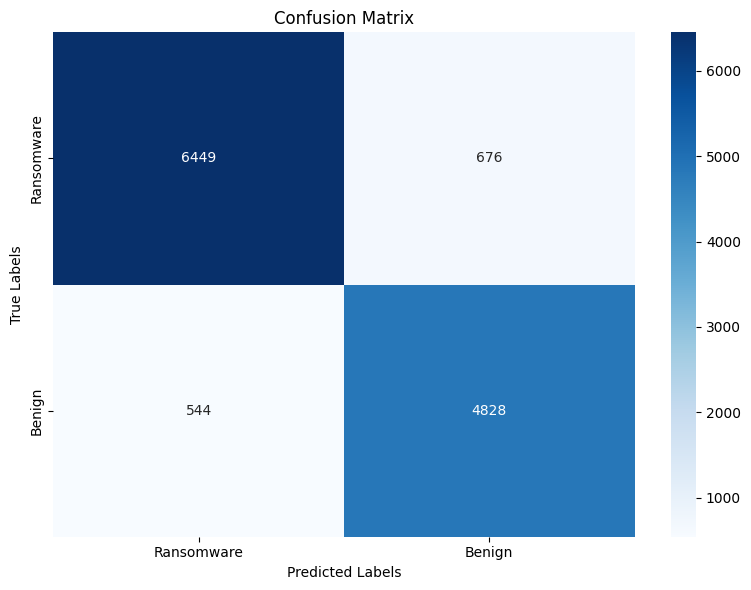

In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

results['Logistic Regression(With CSL)'] = accuracy

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ransomware", "Benign"], yticklabels=["Ransomware", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()

# Show the plot
plt.show()


# SVC - Linear

Accuracy: 0.8577258542050092
Confusion Matrix:
 [[6881  244]
 [1534 3838]]
Classification Report:
 {'0': {'precision': 0.8177064765300059, 'recall': 0.9657543859649123, 'f1-score': 0.8855855855855855, 'support': 7125.0}, '1': {'precision': 0.9402253797158255, 'recall': 0.7144452717795979, 'f1-score': 0.8119314575840914, 'support': 5372.0}, 'accuracy': 0.8577258542050092, 'macro avg': {'precision': 0.8789659281229157, 'recall': 0.8400998288722551, 'f1-score': 0.8487585215848384, 'support': 12497.0}, 'weighted avg': {'precision': 0.8703728402904463, 'recall': 0.8577258542050092, 'f1-score': 0.8539243888484465, 'support': 12497.0}}


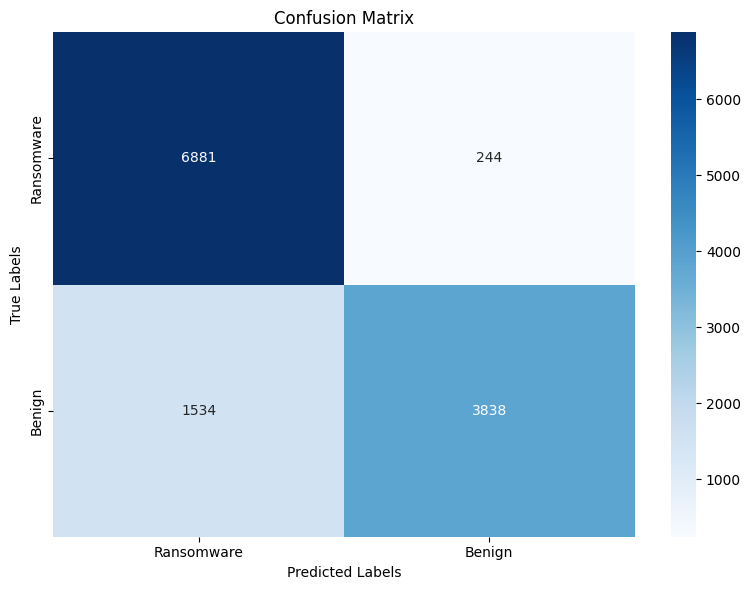

In [ ]:
from sklearn.svm import SVC

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)
# model = SVC(kernel='poly', degree=2, random_state=42)
# model = SVC(kernel='rbf', random_state=42)
# model = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=42)


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

results['SVM (Linear)'] = accuracy

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ransomware", "Benign"], yticklabels=["Ransomware", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()

# Show the plot
plt.show()



# SVC - Polynomial ^ 2

Accuracy: 0.9475874209810354
Confusion Matrix:
 [[6893  232]
 [ 423 4949]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7125
           1       0.96      0.92      0.94      5372

    accuracy                           0.95     12497
   macro avg       0.95      0.94      0.95     12497
weighted avg       0.95      0.95      0.95     12497



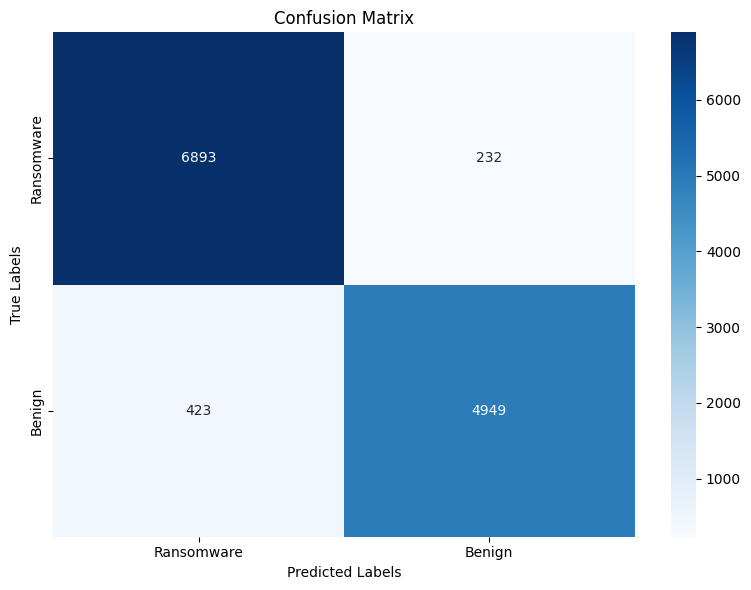

In [ ]:
from sklearn.svm import SVC

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
model = SVC(kernel='poly', degree=2, random_state=42)


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

results['SVM (Poly 2)'] = accuracy

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ransomware", "Benign"], yticklabels=["Ransomware", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()

# Show the plot
plt.show()



# SVC - Polynomial ^ 3

Accuracy: 0.945666960070417
Confusion Matrix:
 [[6980  145]
 [ 534 4838]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7125
           1       0.97      0.90      0.93      5372

    accuracy                           0.95     12497
   macro avg       0.95      0.94      0.94     12497
weighted avg       0.95      0.95      0.95     12497



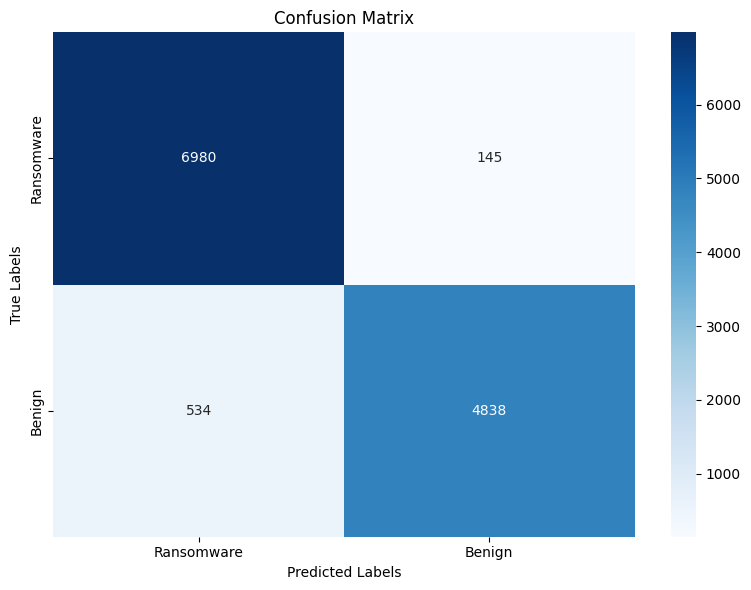

In [ ]:
from sklearn.svm import SVC

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
model = SVC(kernel='poly', degree=3, random_state=42)
# model = SVC(kernel='rbf', random_state=42)
# model = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=42)


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

results['SVM (Poly 3)'] = accuracy

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ransomware", "Benign"], yticklabels=["Ransomware", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()

# Show the plot
plt.show()



# SVC - RBF Default

Accuracy: 0.9654317036088661
Confusion Matrix:
 [[6971  154]
 [ 278 5094]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7125
           1       0.97      0.95      0.96      5372

    accuracy                           0.97     12497
   macro avg       0.97      0.96      0.96     12497
weighted avg       0.97      0.97      0.97     12497



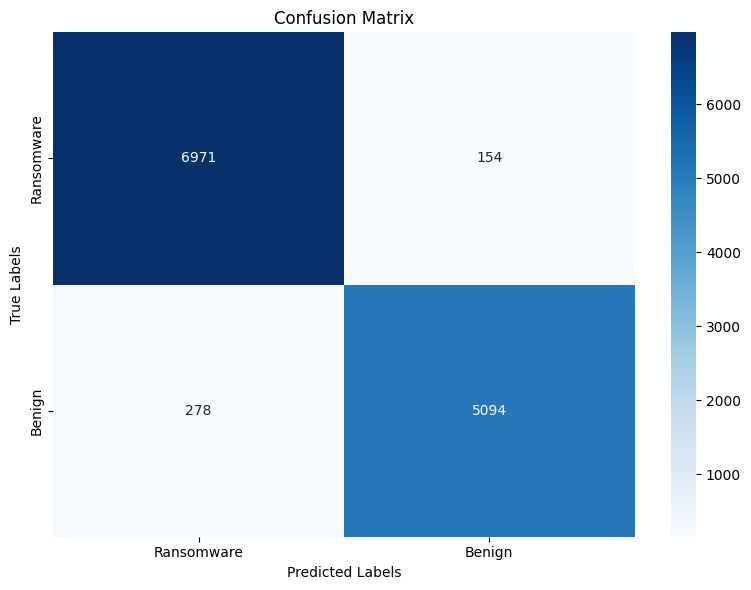

In [ ]:
from sklearn.svm import SVC

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
model = SVC(kernel='rbf', random_state=42)
# model = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=42)


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

results['SVM (RBF)'] = accuracy

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ransomware", "Benign"], yticklabels=["Ransomware", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()

# Show the plot
plt.show()



# SVC - RBF L2 and Hyperparameter Tuning

Accuracy: 0.9546291109866368
Confusion Matrix:
 [[6918  207]
 [ 360 5012]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7125
           1       0.96      0.93      0.95      5372

    accuracy                           0.95     12497
   macro avg       0.96      0.95      0.95     12497
weighted avg       0.95      0.95      0.95     12497



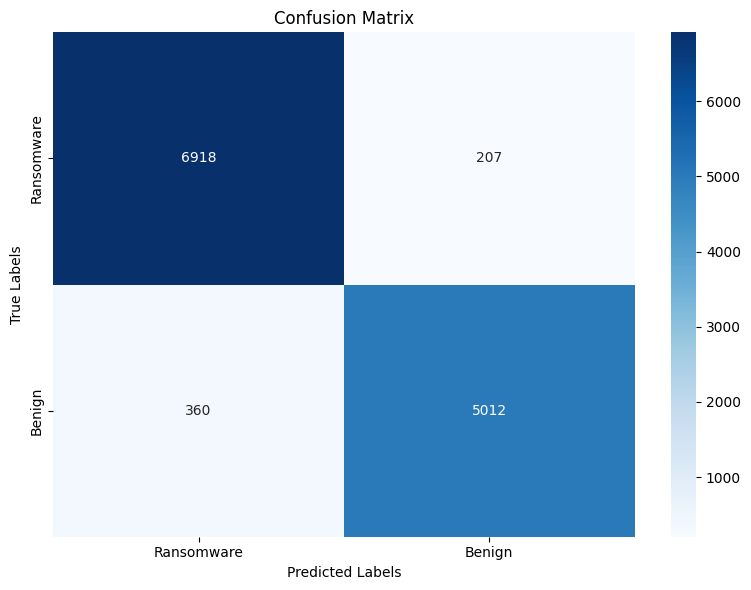

In [ ]:
from sklearn.svm import SVC

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
model = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=42)


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

results['SVM (RBF-L2)'] = accuracy

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ransomware", "Benign"], yticklabels=["Ransomware", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()

# Show the plot
plt.show()



# Random Forest Classifier

Accuracy: 0.9967992318156358
Confusion Matrix:
 [[7106   19]
 [  21 5351]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497

Cross-validation Accuracy: 0.9954549091782028


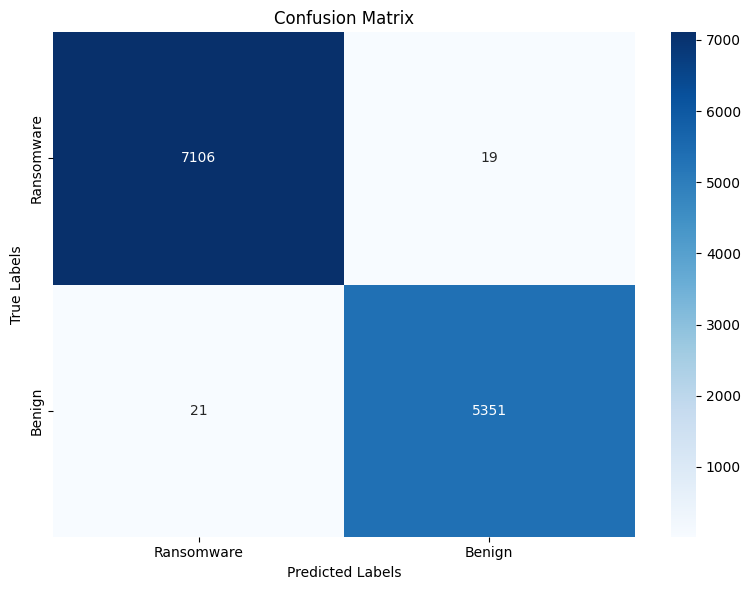

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a model - RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')



# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Cross-validation Accuracy:", scores.mean())

results['Random Forest'] = accuracy

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ransomware", "Benign"], yticklabels=["Ransomware", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()

# Show the plot
plt.show()


# Results

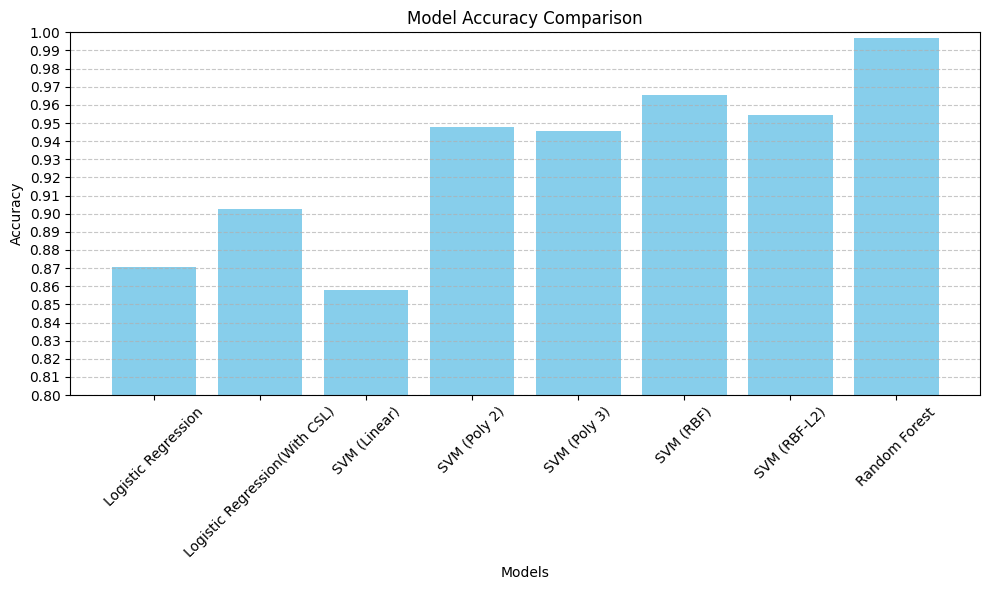

In [ ]:
# Extract data for the bar graph
models = list(results.keys())
accuracies = list(results.values())

# Create a bar graph with y-axis range from 0.8 to 1.0 and 0.01 increments
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set y-axis limits between 0.8 and 1.0
plt.yticks([i / 100 for i in range(80, 101)])  # Add divisions at 0.01 increments (0.80, 0.81, ..., 1.00)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
